# Portfolio 2 #

#### Data Analysis on predicting the energy usage of a house based on IoT measurements of temperature and humidity and weather observations.####

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import time
from datetime import date
from datetime import datetime
plt.style.use('seaborn')
%matplotlib inline

# Interpretation

Importing all the `relevant packages` that will be used for data analysis and data plotting in this notebook.

In [2]:
read_energydata = pd.read_csv('Data/energydata_complete.csv')
read_energydata['date'] = pd.to_datetime(read_energydata['date'])
read_energydata.head()

date  Appliances  lights     T1   RH_1     T2   RH_2     T3  \
0 2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
1 2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2 2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
3 2016-01-11 17:30:00          50      40 19.890 46.067 19.200 44.590 19.790   
4 2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   

    RH_3     T4  ...     T9   RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
0 44.730 19.000  ... 17.033 45.530  6.600      733.500  92.000      7.000   
1 44.790 19.000  ... 17.067 45.560  6.483      733.600  92.000      6.667   
2 44.933 18.927  ... 17.000 45.500  6.367      733.700  92.000      6.333   
3 45.000 18.890  ... 17.000 45.400  6.250      733.800  92.000      6.000   
4 45.000 18.890  ... 17.000 45.400  6.133      733.900  92.000      5.667   

   Visibility  Tdewpoint    rv1    rv2  
0      63.000      5.300 13.275 13.275  
1      59.167      5.200 18.606 18.606  
2      55.333      5.100 28.643 28.643  
3      51.500      5.000 45.410 45.410  
4      47.667      4.900 10.084 10.084  

[5 rows x 29 columns]

# Interpretation

Reading the `complete data (energydata in this case)` via the below code 

In [3]:
print(read_energydata.shape)

(19735, 29)


# Interpretation

Checking the number of `rows and columns` in complete data (energydata)

In [4]:
read_energydata.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

# Interpretation

Checking the name of all the `columns` in complete data (energydata)

In [5]:
read_energydata.tail()

date  Appliances  lights     T1   RH_1     T2   RH_2  \
19730 2016-05-27 17:20:00         100       0 25.567 46.560 25.890 42.026   
19731 2016-05-27 17:30:00          90       0 25.500 46.500 25.754 42.080   
19732 2016-05-27 17:40:00         270      10 25.500 46.597 25.629 42.769   
19733 2016-05-27 17:50:00         420      10 25.500 46.990 25.414 43.036   
19734 2016-05-27 18:00:00         430      10 25.500 46.600 25.264 42.971   

          T3   RH_3     T4  ...     T9   RH_9  T_out  Press_mm_hg  RH_out  \
19730 27.200 41.163 24.700  ... 23.200 46.790 22.733      755.200  55.667   
19731 27.133 41.223 24.700  ... 23.200 46.790 22.600      755.200  56.000   
19732 27.050 41.690 24.700  ... 23.200 46.790 22.467      755.200  56.333   
19733 26.890 41.290 24.700  ... 23.200 46.818 22.333      755.200  56.667   
19734 26.823 41.157 24.700  ... 23.200 46.845 22.200      755.200  57.000   

       Windspeed  Visibility  Tdewpoint    rv1    rv2  
19730      3.333      23.667     13.333 43.097 43.097  
19731      3.500      24.500     13.300 49.283 49.283  
19732      3.667      25.333     13.267 29.199 29.199  
19733      3.833      26.167     13.233  6.323  6.323  
19734      4.000      27.000     13.200 34.119 34.119  

[5 rows x 29 columns]

# Interpretation

Printing the last five records of the dataset using `tail()`

#### A brief description of all the variables in the energy dataset.####

1. date time year-month-day   hour:minute:second 
2. Appliances, energy use in Wh
3. lights, energy use of light fixtures in the house in Wh
4. T1, Temperature in kitchen area, in Celsius
5. RH_1, Humidity in kitchen area, in %
6. T2, Temperature in living room area, in Celsius
7. RH_2, Humidity in living room area, in %
8. T3, Temperature in laundry room area
9. RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chièvres weather station), in Celsius
23. Pressure (from Chièvres weather station), in mm Hg
24. RH_out, Humidity outside (from Chièvres weather station), in %
25. Windspeed (from Chièvres weather station), in m/s
26. Visibility (from Chièvres weather station), in km
27. Tdewpoint (from Chièvres weather station), °C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

In [6]:
read_energydata.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

# Interpretation

To check that whether there are any `null values` in the dataset or not. For this dataset, we can conclude that there are not any null values in any of the columns

In [7]:
read_energydata.describe()

Appliances    lights        T1      RH_1        T2      RH_2        T3  \
count   19735.000 19735.000 19735.000 19735.000 19735.000 19735.000 19735.000   
mean       97.695     3.802    21.687    40.260    20.341    40.420    22.268   
std       102.525     7.936     1.606     3.979     2.193     4.070     2.006   
min        10.000     0.000    16.790    27.023    16.100    20.463    17.200   
25%        50.000     0.000    20.760    37.333    18.790    37.900    20.790   
50%        60.000     0.000    21.600    39.657    20.000    40.500    22.100   
75%       100.000     0.000    22.600    43.067    21.500    43.260    23.290   
max      1080.000    70.000    26.260    63.360    29.857    56.027    29.236   

           RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
count 19735.000 19735.000 19735.000  ... 19735.000 19735.000 19735.000   
mean     39.243    20.855    39.027  ...    19.486    41.552     7.412   
std       3.255     2.043     4.341  ...     2.015     4.151     5.317   
min      28.767    15.100    27.660  ...    14.890    29.167    -5.000   
25%      36.900    19.530    35.530  ...    18.000    38.500     3.667   
50%      38.530    20.667    38.400  ...    19.390    40.900     6.917   
75%      41.760    22.100    42.157  ...    20.600    44.338    10.408   
max      50.163    26.200    51.090  ...    24.500    53.327    26.100   

       Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1  \
count    19735.000 19735.000  19735.000   19735.000  19735.000 19735.000   
mean       755.523    79.750      4.040      38.331      3.761    24.988   
std          7.399    14.901      2.451      11.795      4.195    14.497   
min        729.300    24.000      0.000       1.000     -6.600     0.005   
25%        750.933    70.333      2.000      29.000      0.900    12.498   
50%        756.100    83.667      3.667      40.000      3.433    24.898   
75%        760.933    91.667      5.500      40.000      6.567    37.584   
max        772.300   100.000     14.000      66.000     15.500    49.997   

            rv2  
count 19735.000  
mean     24.988  
std      14.497  
min       0.005  
25%      12.498  
50%      24.898  
75%      37.584  
max      49.997  

[8 rows x 28 columns]

# Interpretation

To display the `mean, std, minimum, maximum, 25%, 50% and 75%` for the complete datatset values for each column using the describe function

## `Starting with the analysis on energydata (complete data)`

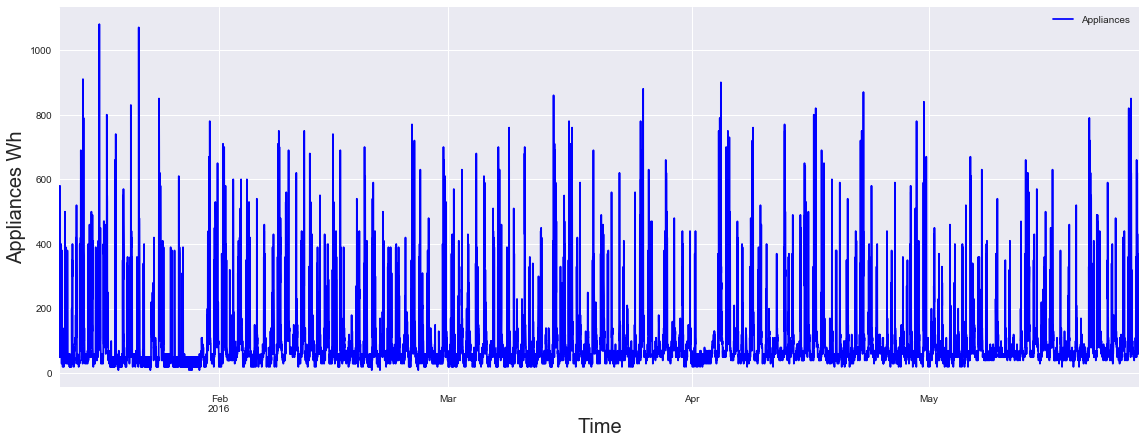

In [8]:
read_energydata_1 = pd.to_datetime(read_energydata['date'])
read_energydata.plot (kind = 'line', x = 'date', y = 'Appliances', figsize = (8,7), color = 'b')
plt.xlabel("Time", size = 20)
plt.ylabel("Appliances Wh", size = 20)
plt.subplots_adjust(right = 2)

# Interpretation

Plotting the `line graph` of energydata for `each month` between `Time and Appliances Wh`

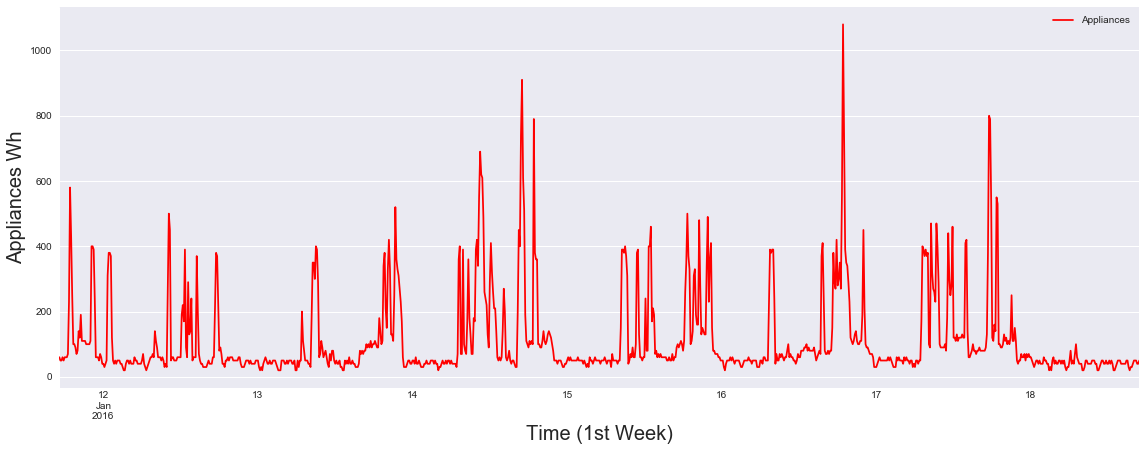

In [9]:
read_energydata_1 = pd.to_datetime(read_energydata['date'])
read_energydata[1:1008].plot (kind = 'line', x = 'date', y = 'Appliances', figsize = (8,7), color = 'r')
plt.xlabel("Time (1st Week)", size = 20)
plt.ylabel("Appliances Wh", size = 20)
plt.subplots_adjust(right = 2)

# Interpretation

Plotting the `line graph` of energydata for `1st Week` between `Time and Appliances Wh`

Text(0, 0.5, 'Frequency')

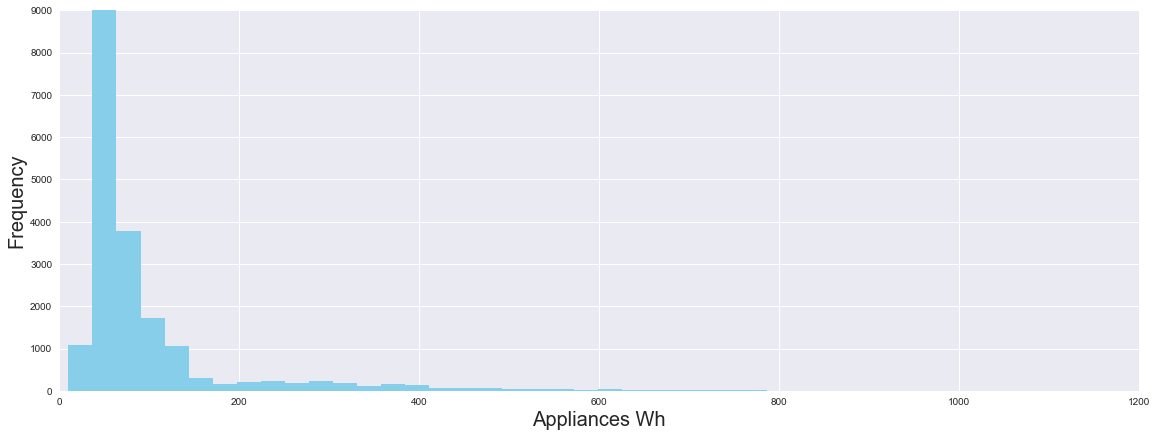

In [10]:
read_energydata['Appliances'].plot.hist(bins=40, color = 'skyblue', figsize = (8,7)) 
plt.subplots_adjust(right=2)
plt.xlim([0,1200])
plt.xlabel("Appliances Wh", size = 20)
plt.ylim(0,9000,2000)
plt.ylabel("Frequency", size = 20)

# Interpretation

Plotting the `histogram` of energydata for `Appliances Wh` with `Frequency`. As can be seen from the plot, this is skewed to the right.

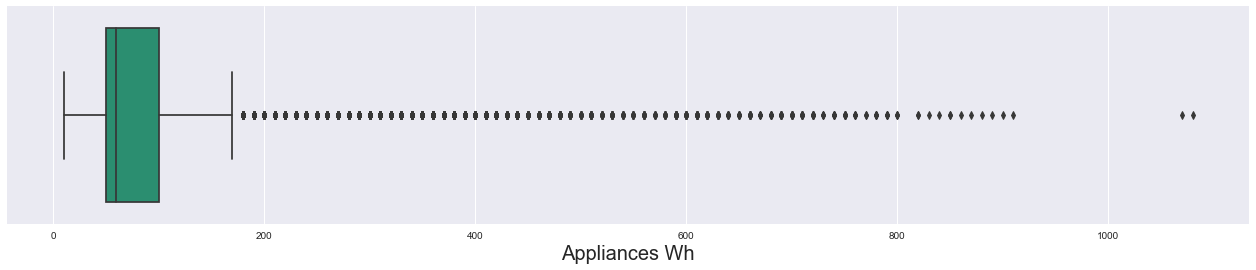

In [11]:
bp = sns.boxplot(x=read_energydata["Appliances"], palette = "Dark2")
plt.xlabel("Appliances Wh", size = 20)
plt.subplots_adjust(right=3)

# Interpretation

Plotting the `boxplot` of the data for `Appliances Wh` .This boxplot has quite a lot number of outliers (out of range data).

In [12]:
read_trainingdata = pd.read_csv('Data/training.csv' ,index_col='date')
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:00:00 44.730 19.000 45.567  ...      733.500  92.000      7.000   
2016-01-11 17:10:00 44.790 19.000 45.992  ...      733.600  92.000      6.667   
2016-01-11 17:20:00 44.933 18.927 45.890  ...      733.700  92.000      6.333   
2016-01-11 17:40:00 45.000 18.890 45.530  ...      733.900  92.000      5.667   
2016-01-11 17:50:00 44.933 18.890 45.730  ...      734.000  92.000      5.333   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:00:00      63.000      5.300 13.275 13.275  61200     Weekday   
2016-01-11 17:10:00      59.167      5.200 18.606 18.606  61800     Weekday   
2016-01-11 17:20:00      55.333      5.100 28.643 28.643  62400     Weekday   
2016-01-11 17:40:00      47.667      4.900 10.084 10.084  63600     Weekday   
2016-01-11 17:50:00      43.833      4.800 44.919 44.919  64200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:00:00       Monday  
2016-01-11 17:10:00       Monday  
2016-01-11 17:20:00       Monday  
2016-01-11 17:40:00       Monday  
2016-01-11 17:50:00       Monday  

[5 rows x 31 columns]

# Interpretation

Reading the `training data`. Printing the shape and top five rows of data. Training data and testing data has been split from the complete data (Energy data)

In [13]:
read_trainingdata.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

# Interpretation

Checking the `names of all the columns` in training data. In all, we have a total of 32 columns.

In [14]:
read_trainingdata.isnull().any()

Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
NSM            False
WeekStatus     False
Day_of_week    False
dtype: bool

# Interpretation

Checking that whether there are `any null values` in the `training dataset` or not.

In [15]:
read_trainingdata.describe()

Appliances    lights        T1      RH_1        T2      RH_2        T3  \
count   14803.000 14803.000 14803.000 14803.000 14803.000 14803.000 14803.000   
mean       98.011     3.803    21.684    40.271    20.343    40.418    22.263   
std       102.828     7.940     1.608     3.982     2.192     4.066     2.014   
min        10.000     0.000    16.790    27.023    16.100    20.893    17.200   
25%        50.000     0.000    20.730    37.362    18.823    37.900    20.790   
50%        60.000     0.000    21.600    39.657    20.000    40.500    22.100   
75%       100.000     0.000    22.600    43.090    21.500    43.290    23.290   
max      1080.000    50.000    26.260    63.360    29.857    56.027    29.236   

           RH_3        T4      RH_4  ...      RH_9     T_out  Press_mm_hg  \
count 14803.000 14803.000 14803.000  ... 14803.000 14803.000    14803.000   
mean     39.249    20.855    39.030  ...    41.542     7.413      755.503   
std       3.253     2.045     4.340  ...     4.151     5.324        7.428   
min      28.767    15.100    27.660  ...    29.167    -5.000      729.300   
25%      36.900    19.500    35.530  ...    38.500     3.667      750.867   
50%      38.530    20.667    38.400  ...    40.863     6.900      756.100   
75%      41.762    22.100    42.130  ...    44.363    10.400      760.933   
max      50.163    26.200    51.063  ...    53.327    25.967      772.300   

         RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  \
count 14803.000  14803.000   14803.000  14803.000 14803.000 14803.000   
mean     79.734      4.034      38.330      3.757    25.078    25.078   
std      14.956      2.437      11.813      4.200    14.482    14.482   
min      24.000      0.000       1.000     -6.600     0.005     0.005   
25%      70.000      2.000      29.000      0.900    12.580    12.580   
50%      83.667      3.667      40.000      3.450    25.044    25.044   
75%      91.667      5.500      40.000      6.533    37.666    37.666   
max     100.000     13.500      66.000     15.500    49.997    49.997   

            NSM  
count 14803.000  
mean  42985.989  
std   24968.649  
min       0.000  
25%   21600.000  
50%   43200.000  
75%   64800.000  
max   85800.000  

[8 rows x 29 columns]

# Interpretation

To display the `mean, std, minimum, maximum, 25%, 50% and 75%` for the training datatset values for each column using the describe function.

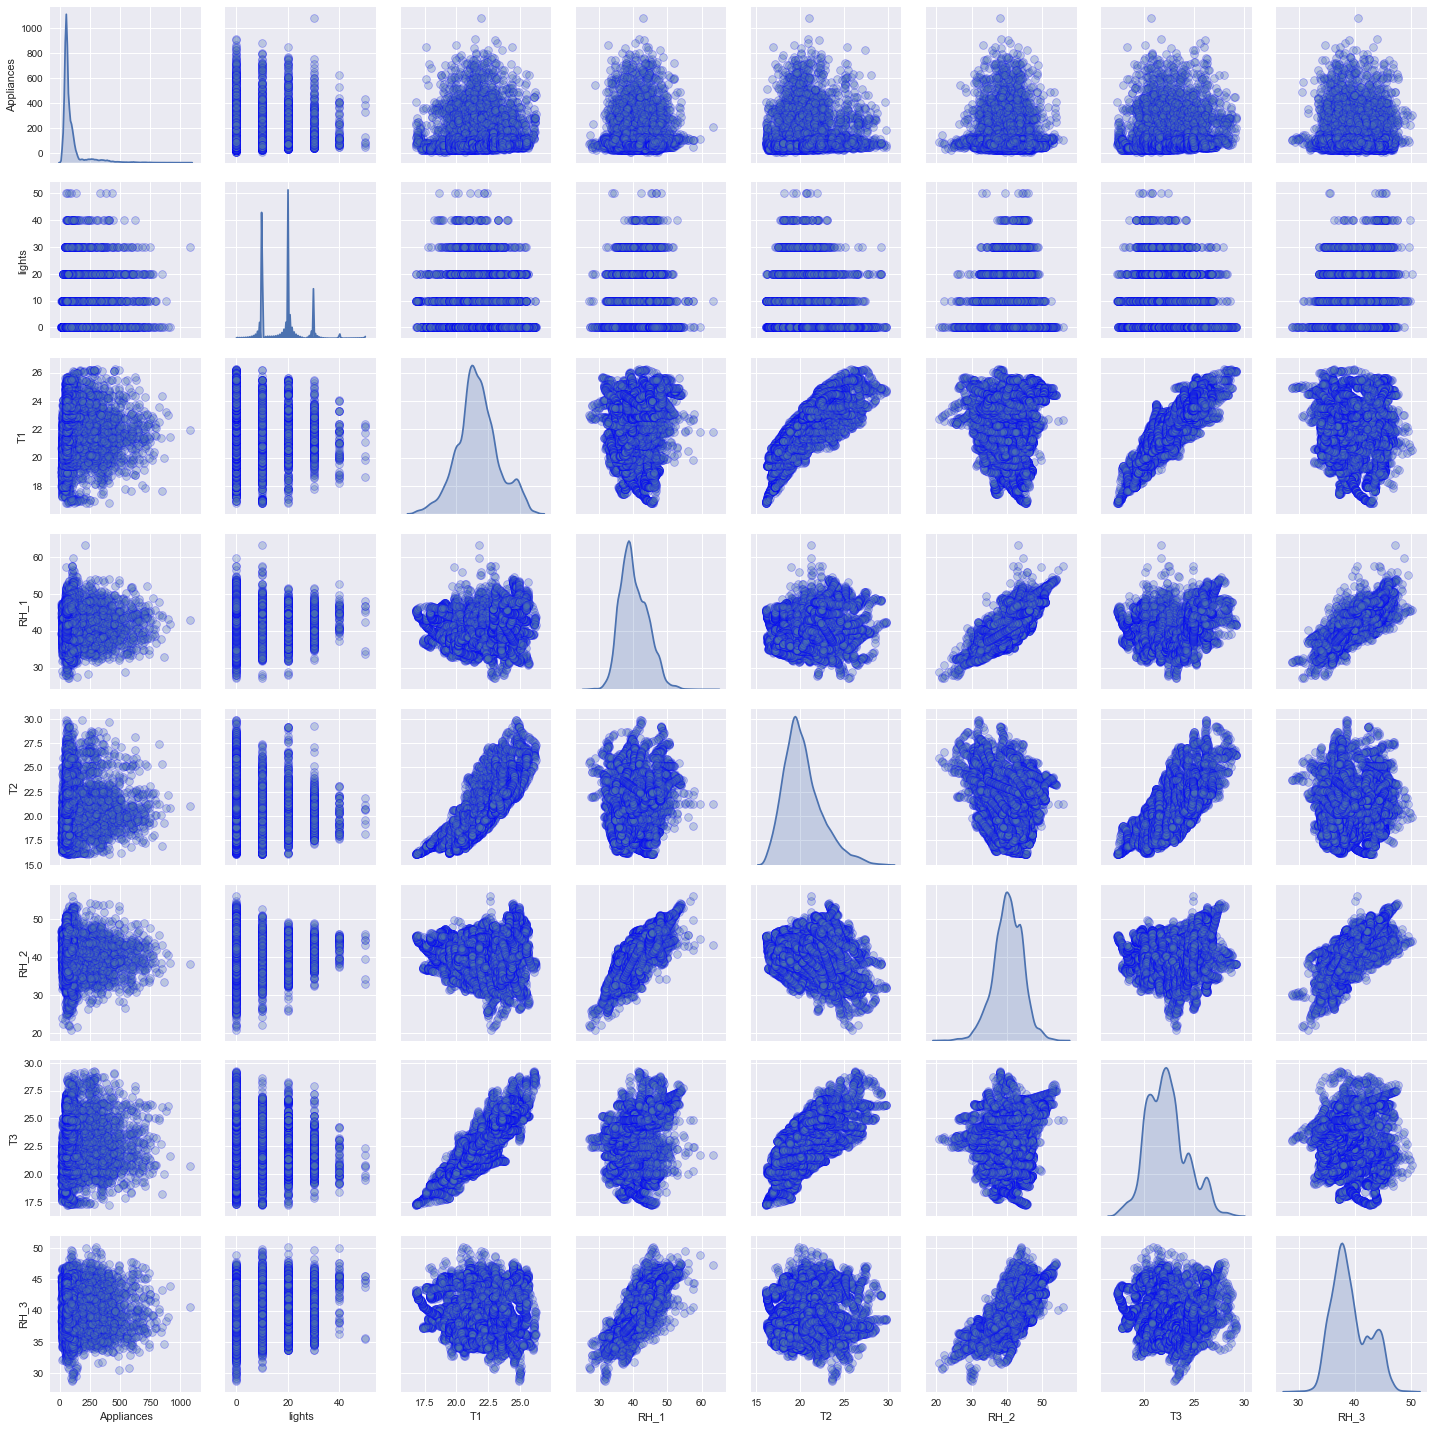

In [16]:
read_trainingdata =read_trainingdata [["Appliances", "lights","T1","RH_1","T2","RH_2","T3","RH_3"]]
sns.pairplot(read_trainingdata,diag_kind = 'kde',plot_kws = {'alpha': 0.3, 's': 60, 'edgecolor': 'b'})

# Interpretation

Plotting the `first pairplot` by using the `training data` between `"Appliances", "lights","T1","RH_1","T2","RH_2","T3" and "RH_3`. From this pairplot, we can infer the following:

1. There is a positive correlation between Appliances and lights.
2. There is a positive correlation between T1 and T3.

In [17]:
read_energydata['date_day_name'] = read_energydata['date'].dt.weekday_name
read_energydata['date_hour'] = read_energydata['date'].dt.hour

# Interpretation

Created New Columns in the energy dataset with `weekday name and hour`

In [18]:
F_month = read_energydata.loc[(read_energydata.date >= '2016-01-01') & (read_energydata.date <= '2016-01-28')]
S_month = read_energydata.loc[(read_energydata.date >= '2016-02-01') & (read_energydata.date <= '2016-02-28')]
T_month = read_energydata.loc[(read_energydata.date >= '2016-03-01') & (read_energydata.date <= '2016-03-28')]
Frth_month = read_energydata.loc[(read_energydata.date >= '2016-04-01') & (read_energydata.date <= '2016-04-28')]

# Interpretation

Splitting the dataframe based on months (`first,second,third and fourth`)

In [19]:
F_monthv2 = pd.pivot_table(F_month[['date_day_name','date_hour','Appliances']],index=['date_day_name','date_hour'],aggfunc='sum')
S_monthv2 = pd.pivot_table(S_month[['date_day_name','date_hour','Appliances']],index=['date_day_name','date_hour'],aggfunc='sum')
T_monthv2 = pd.pivot_table(T_month[['date_day_name','date_hour','Appliances']],index=['date_day_name','date_hour'],aggfunc='sum')
Frth_monthv2 = pd.pivot_table(Frth_month[['date_day_name','date_hour','Appliances']],index=['date_day_name','date_hour'],aggfunc='sum')

# Interpretation

Making a pivot table with day name and hour over appliances

In [20]:
F_monthv3 = F_monthv2.unstack(level=0)
S_monthv3 = S_monthv2.unstack(level=0)
T_monthv3 = T_monthv2.unstack(level=0)
Frth_monthv3 = Frth_monthv2.unstack(level=0)

# Interpretation

Unstacking the Dataframes

In [21]:
F_monthv3 = F_monthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
S_monthv3 = S_monthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
T_monthv3 = T_monthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Frth_monthv3 = Frth_monthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)

# Interpretation

Re-indexing the labels in order

In [22]:
day_short_names = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']

# Interpretation

Giving week days their short forms for better readability in the plots.

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

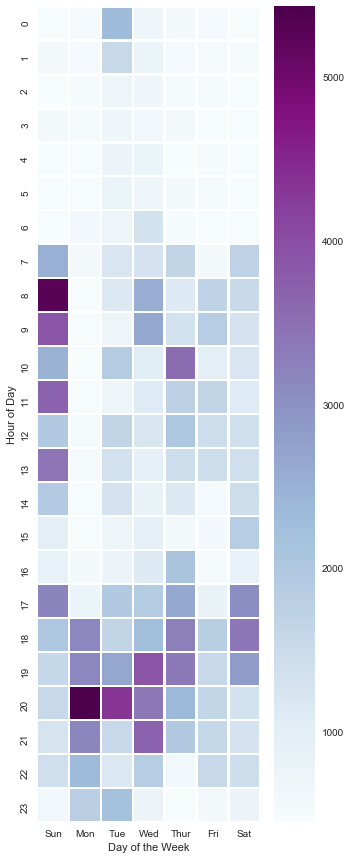

In [23]:
F_month =plt.subplots(figsize=(5,15))
ax=sns.heatmap(F_monthv3,cmap="BuPu",linewidths=1.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Interpretation

Plotting the heatmap for the first week to identify the trends/ hour of the day when energy consumption is high/low.
As we can interpret from the first week's data heatmap, that the energy consumption is generally high during the evening hours. (Around/ after 6 pm)

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

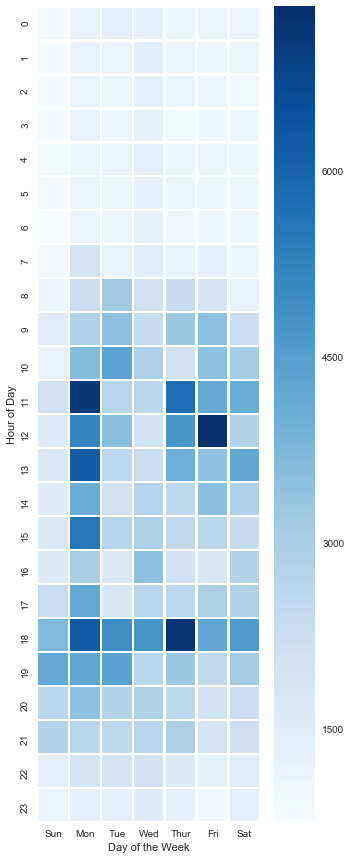

In [24]:
S_month =plt.subplots(figsize=(5,15))
ax=sns.heatmap(S_monthv3,cmap="Blues",linewidths=1.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Interpretation

Plotting the heatmap for `week 2`

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

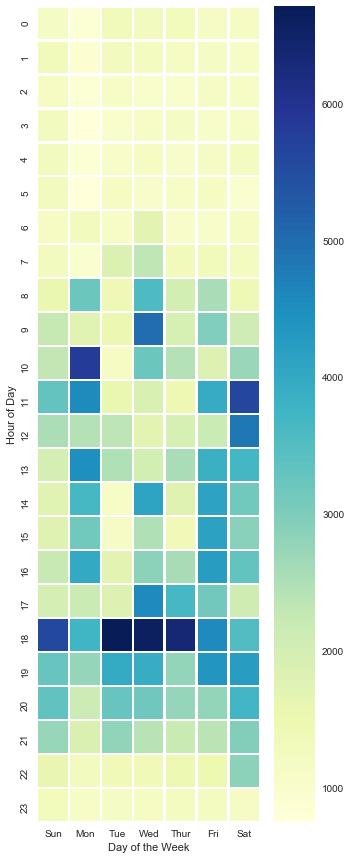

In [25]:
T_month =plt.subplots(figsize=(5,15))
ax=sns.heatmap(T_monthv3,cmap="YlGnBu",linewidths=1.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Interpretation

Plotting the heatmap for `week 3`

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

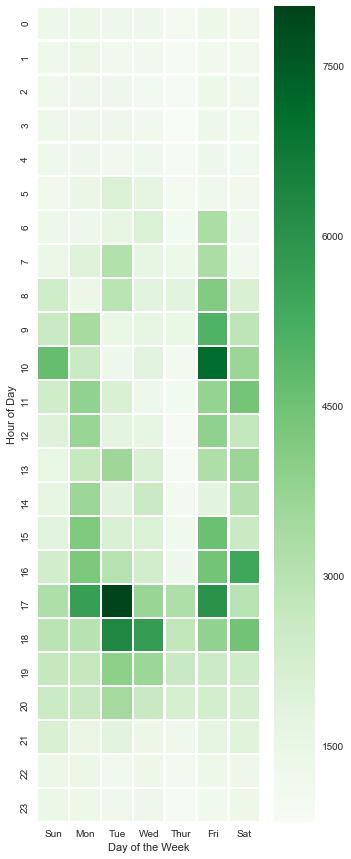

In [26]:
Frth_month =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Frth_monthv3,cmap="Greens",linewidths=1.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

#### Plotting the heatmap for week 4 ####

In [27]:
read_trainingdata = pd.read_csv('Data/training.csv' ,index_col='date')
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:00:00 44.730 19.000 45.567  ...      733.500  92.000      7.000   
2016-01-11 17:10:00 44.790 19.000 45.992  ...      733.600  92.000      6.667   
2016-01-11 17:20:00 44.933 18.927 45.890  ...      733.700  92.000      6.333   
2016-01-11 17:40:00 45.000 18.890 45.530  ...      733.900  92.000      5.667   
2016-01-11 17:50:00 44.933 18.890 45.730  ...      734.000  92.000      5.333   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:00:00      63.000      5.300 13.275 13.275  61200     Weekday   
2016-01-11 17:10:00      59.167      5.200 18.606 18.606  61800     Weekday   
2016-01-11 17:20:00      55.333      5.100 28.643 28.643  62400     Weekday   
2016-01-11 17:40:00      47.667      4.900 10.084 10.084  63600     Weekday   
2016-01-11 17:50:00      43.833      4.800 44.919 44.919  64200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:00:00       Monday  
2016-01-11 17:10:00       Monday  
2016-01-11 17:20:00       Monday  
2016-01-11 17:40:00       Monday  
2016-01-11 17:50:00       Monday  

[5 rows x 31 columns]

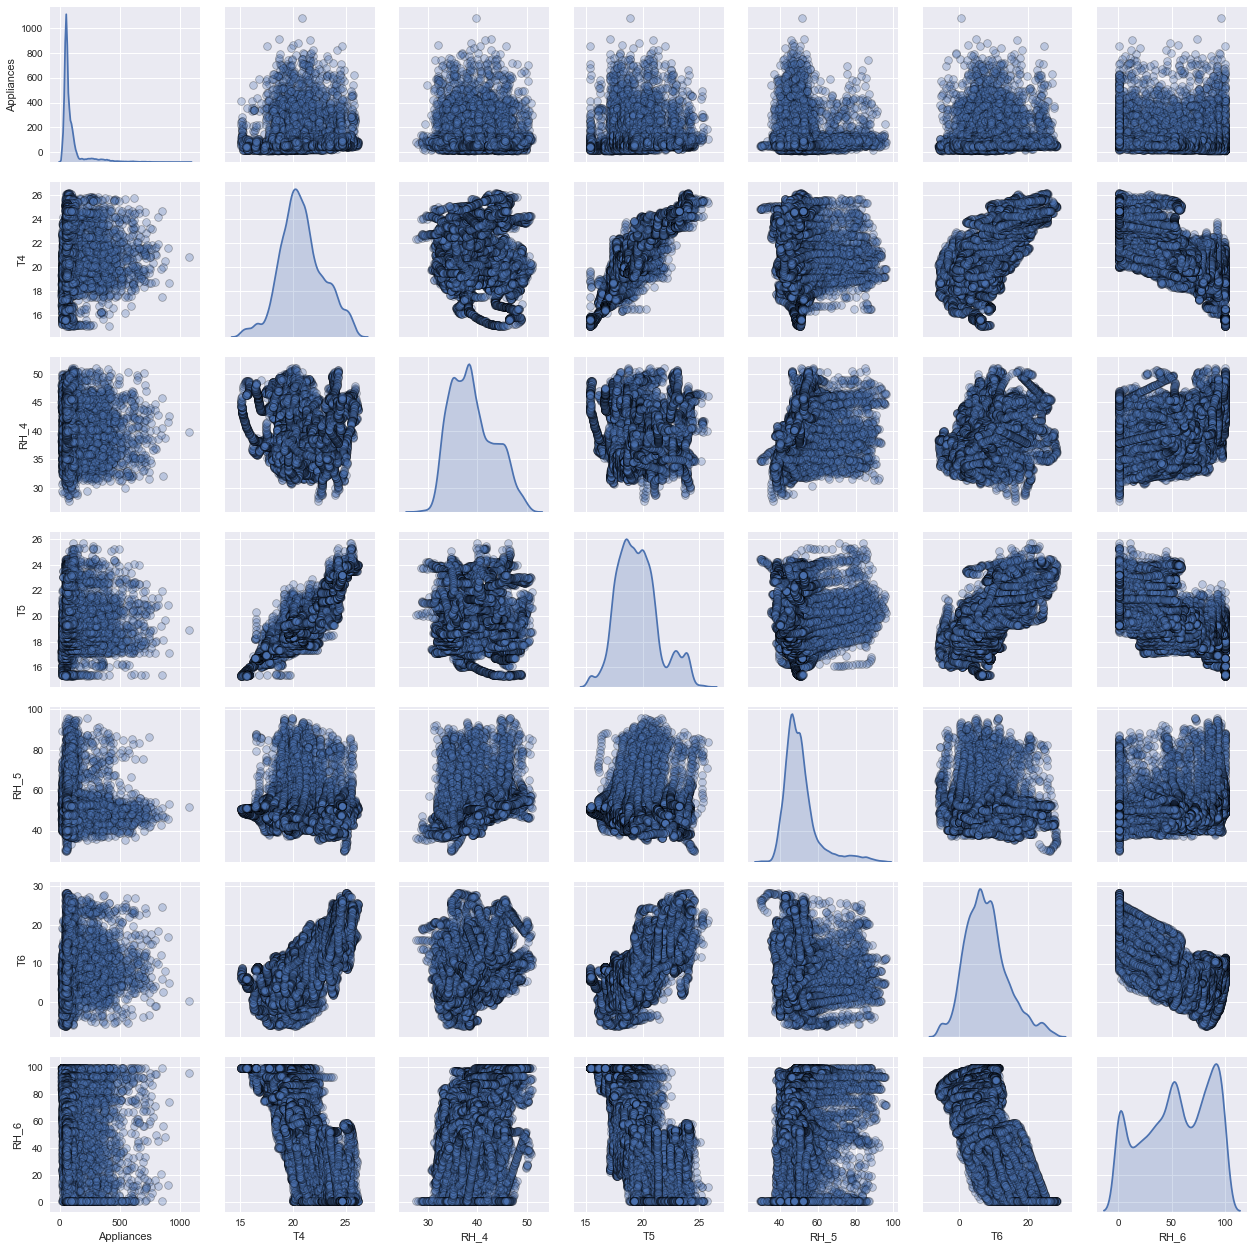

In [28]:
read_trainingdata =read_trainingdata [["Appliances","T4","RH_4","T5","RH_5","T6","RH_6"]]
sns.pairplot(read_trainingdata,diag_kind = 'kde',plot_kws = {'alpha': 0.3, 's': 60, 'edgecolor': 'k'})

# Interpretation

Plotting the `second pairplot` by using the `training data` between the columns `Appliances,T4,RH_4,T5,RH_5,T6,RH_6`
We can draw the below conclusions from this plot:

1. There is a high correlation between Appliances and outdoor temperature (T6).
2. There is a negative correlation between Appliances and outdoor humidity (RH6).

In [29]:
read_trainingdata = pd.read_csv('Data/training.csv' ,index_col='date')
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:00:00 44.730 19.000 45.567  ...      733.500  92.000      7.000   
2016-01-11 17:10:00 44.790 19.000 45.992  ...      733.600  92.000      6.667   
2016-01-11 17:20:00 44.933 18.927 45.890  ...      733.700  92.000      6.333   
2016-01-11 17:40:00 45.000 18.890 45.530  ...      733.900  92.000      5.667   
2016-01-11 17:50:00 44.933 18.890 45.730  ...      734.000  92.000      5.333   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:00:00      63.000      5.300 13.275 13.275  61200     Weekday   
2016-01-11 17:10:00      59.167      5.200 18.606 18.606  61800     Weekday   
2016-01-11 17:20:00      55.333      5.100 28.643 28.643  62400     Weekday   
2016-01-11 17:40:00      47.667      4.900 10.084 10.084  63600     Weekday   
2016-01-11 17:50:00      43.833      4.800 44.919 44.919  64200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:00:00       Monday  
2016-01-11 17:10:00       Monday  
2016-01-11 17:20:00       Monday  
2016-01-11 17:40:00       Monday  
2016-01-11 17:50:00       Monday  

[5 rows x 31 columns]

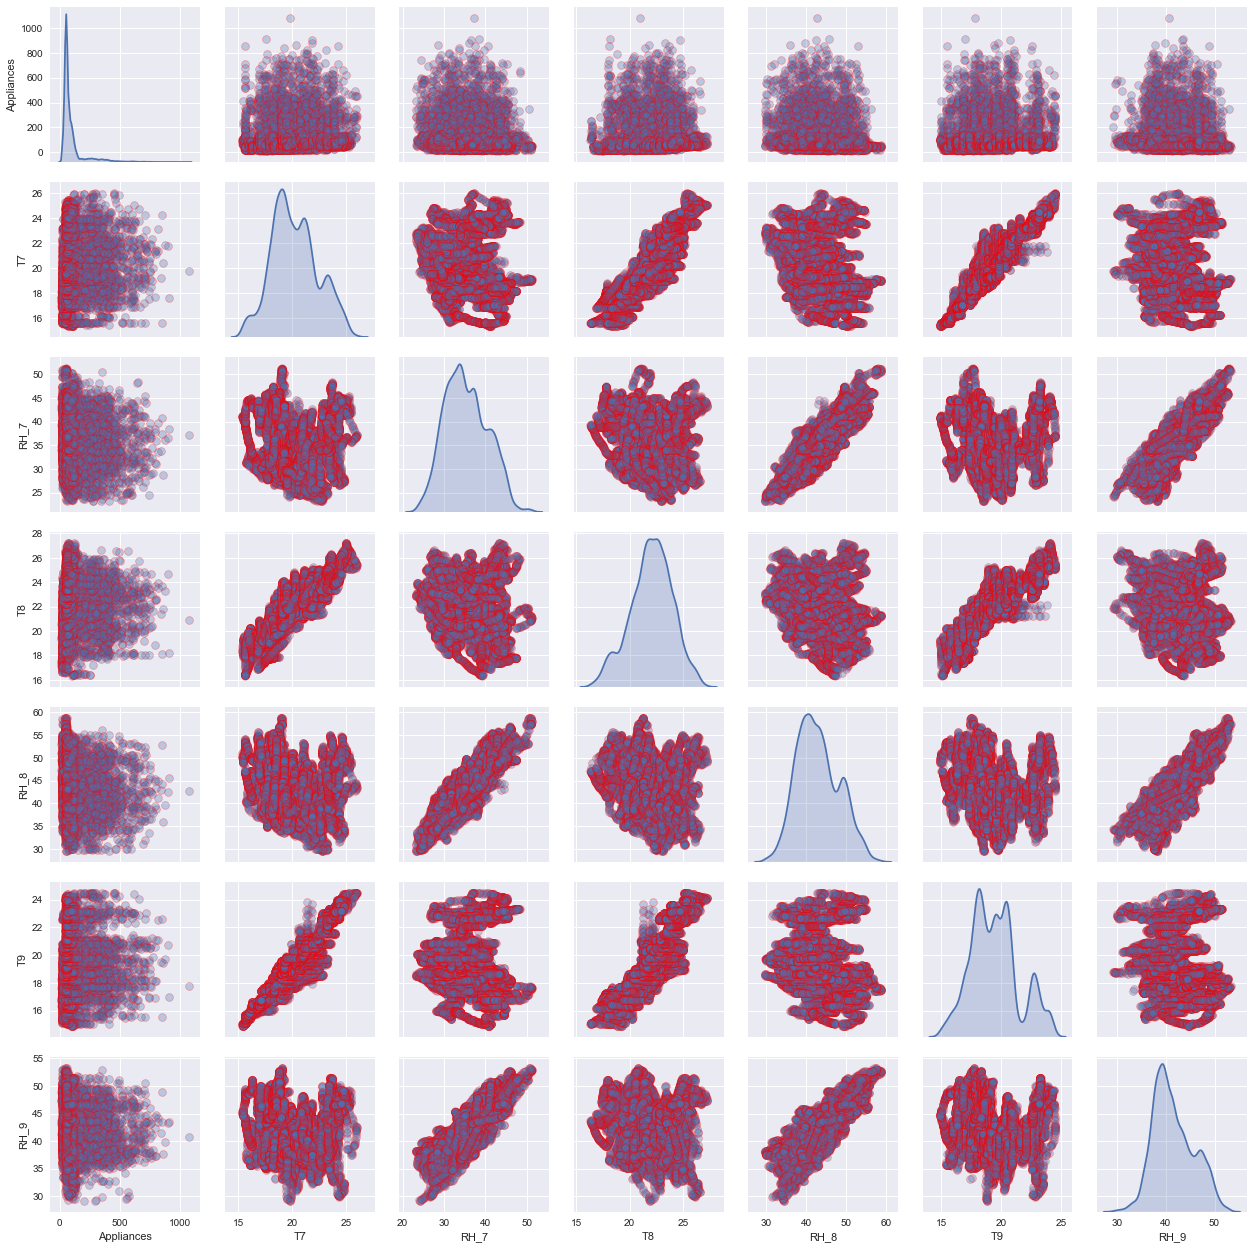

In [30]:
read_trainingdata =read_trainingdata [["Appliances","T7","RH_7","T8","RH_8","T9","RH_9"]]
sns.pairplot(read_trainingdata,diag_kind = 'kde',plot_kws = {'alpha': 0.3, 's': 60, 'edgecolor': 'r'})

# Interpretation

Plotting the `third pairplot` by using the `training data` between the columns `Appliances,T7,RH_7,T8,RH_8,T9,RH_9`. We can draw the below conclusion from this plot:

1. Appliances and T7 (Temperature in ironing room) are positively correlated.
2. Appliances and T8 (Temperature in teenager room 2) are positively correlated.
3. Appliances and T9 (Temperature in parents room) are positively correlated.

In [31]:
read_trainingdata = pd.read_csv('Data/training.csv' ,index_col='date')
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:00:00 44.730 19.000 45.567  ...      733.500  92.000      7.000   
2016-01-11 17:10:00 44.790 19.000 45.992  ...      733.600  92.000      6.667   
2016-01-11 17:20:00 44.933 18.927 45.890  ...      733.700  92.000      6.333   
2016-01-11 17:40:00 45.000 18.890 45.530  ...      733.900  92.000      5.667   
2016-01-11 17:50:00 44.933 18.890 45.730  ...      734.000  92.000      5.333   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:00:00      63.000      5.300 13.275 13.275  61200     Weekday   
2016-01-11 17:10:00      59.167      5.200 18.606 18.606  61800     Weekday   
2016-01-11 17:20:00      55.333      5.100 28.643 28.643  62400     Weekday   
2016-01-11 17:40:00      47.667      4.900 10.084 10.084  63600     Weekday   
2016-01-11 17:50:00      43.833      4.800 44.919 44.919  64200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:00:00       Monday  
2016-01-11 17:10:00       Monday  
2016-01-11 17:20:00       Monday  
2016-01-11 17:40:00       Monday  
2016-01-11 17:50:00       Monday  

[5 rows x 31 columns]

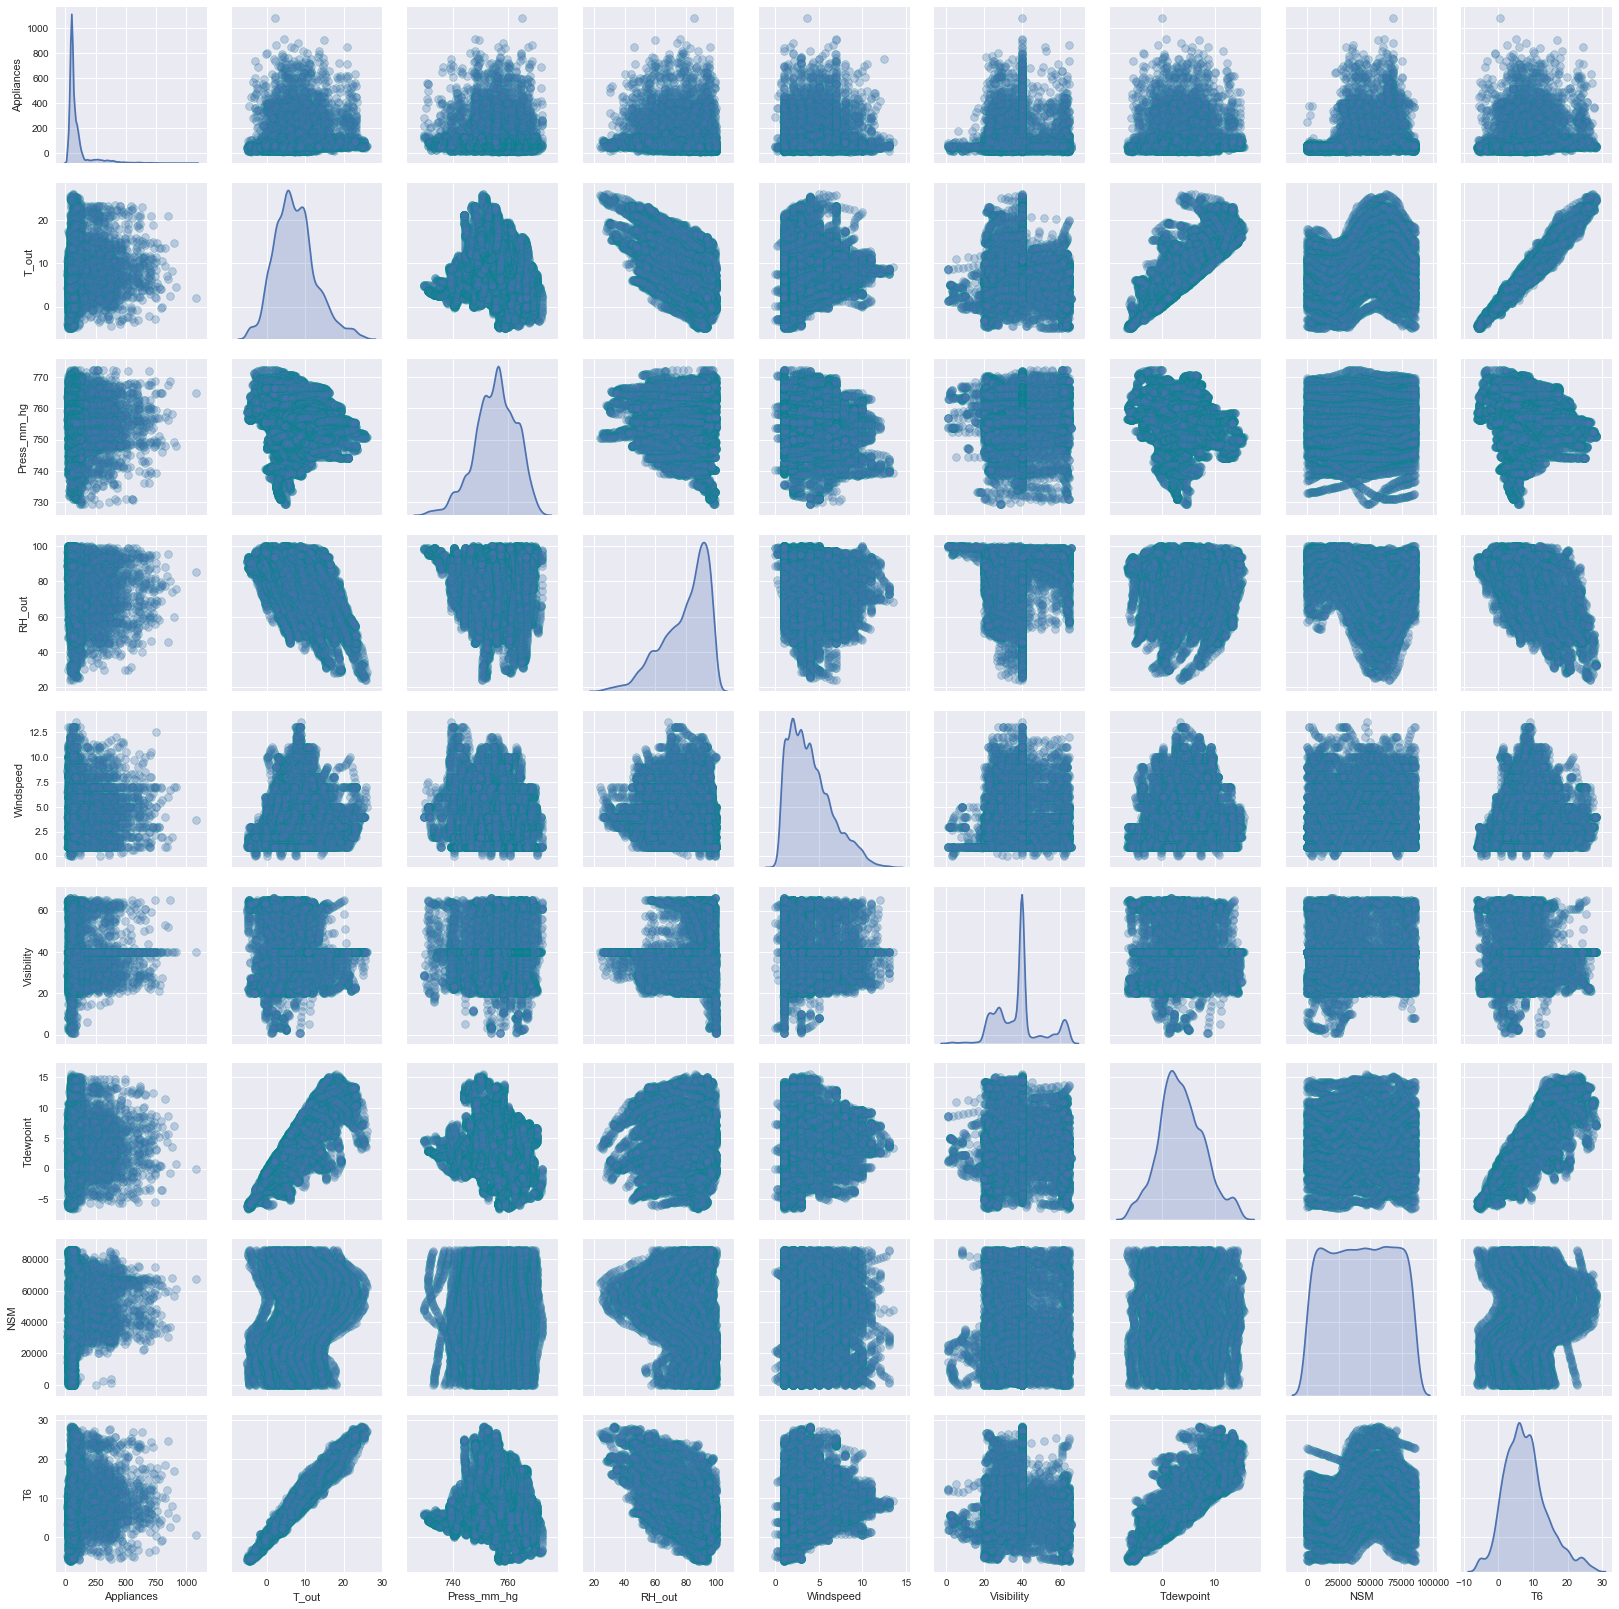

In [32]:
read_trainingdata =read_trainingdata [["Appliances","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","NSM","T6"]]
sns.pairplot(read_trainingdata,diag_kind = 'kde',plot_kws = {'alpha': 0.3, 's': 60, 'edgecolor': 'darkcyan'})

# Interpretation

Plotting the `fourth pairplot` by using the `training data` between the columns `Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,T6`. We can draw the below conclusion from this pairplot:

1. Appliances and NSM are positively correlated.
2. Appliances and T_out(outdoor temperature) are positively correlated.

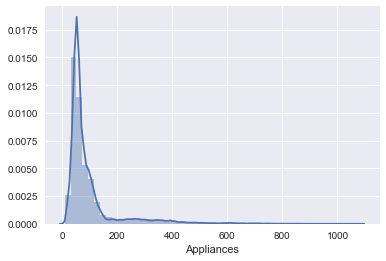

In [33]:
sns.distplot(read_trainingdata['Appliances'])

# Interpretation

Plotting a `distplot for appliances` to observe the spread of the data. From this distplot, we can say that data is skewed to the right (Looks like a right skewed distribution)

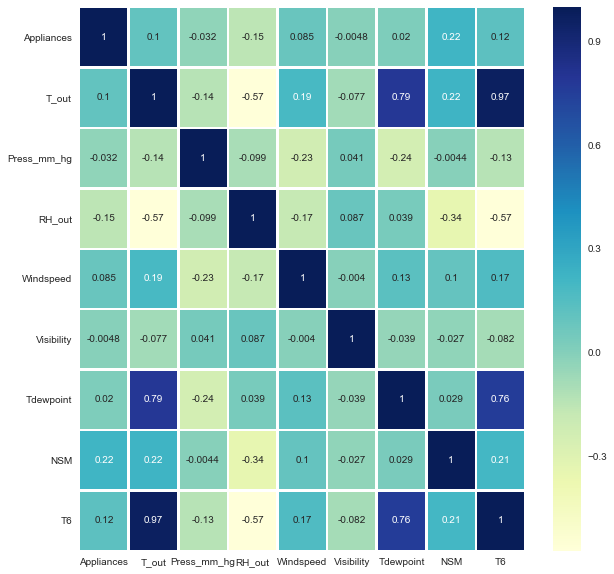

In [34]:
xxx =plt.subplots(figsize=(10,10))
ax=sns.heatmap(read_trainingdata.corr(),cmap="YlGnBu",linewidths=1.5,annot=True)

# Interpretation

This heatmap shows the relationship between various variables with each other for the training data. We can draw some of the conclusions by referring to this matrix of correlation:

1. The ones displayed in dark colors are positively/highly correlated with each other.
2. The ones appearing in light colors are negative/weakly correlated with each other.

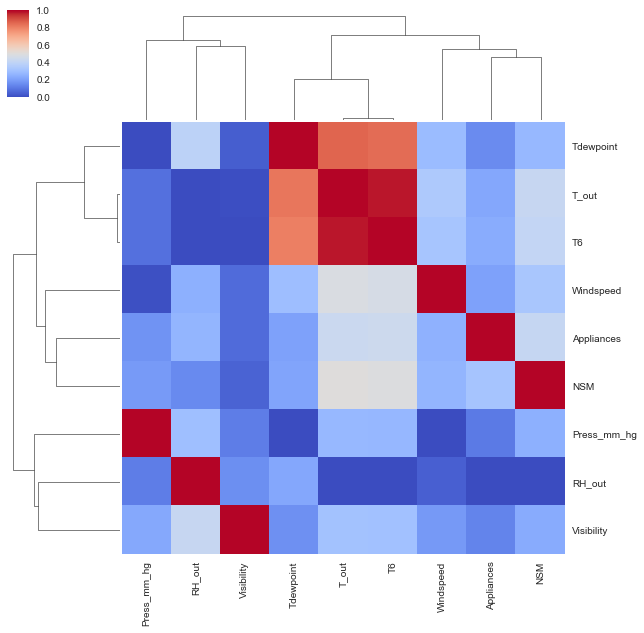

In [35]:
sns.clustermap(read_trainingdata.corr(),cmap='coolwarm',standard_scale=1)

# Interpretation

This clustermap is another way of displaying the relationship between variables in the training data. The color displayed with dark colrors denote that variables are highly correlated at that point and the light colors signify that variables are weakly correlated.

# Training a Linear Regression Model

Let's now begin to train out regression model..

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable. In this case we have taken Price as the target variable.

We will remove two columns namely `WeekStatus and Day_of_week` because both these columns are storing categorical values that the linear regression model cannot use.

In [36]:
read_trainingdata = pd.read_csv('Data/training.csv')
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 32)


date  Appliances  lights     T1   RH_1     T2   RH_2     T3  \
0  2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
1  2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2  2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
3  2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
4  2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

    RH_3     T4  ...  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  \
0 44.730 19.000  ...      733.500  92.000      7.000      63.000      5.300   
1 44.790 19.000  ...      733.600  92.000      6.667      59.167      5.200   
2 44.933 18.927  ...      733.700  92.000      6.333      55.333      5.100   
3 45.000 18.890  ...      733.900  92.000      5.667      47.667      4.900   
4 44.933 18.890  ...      734.000  92.000      5.333      43.833      4.800   

     rv1    rv2    NSM  WeekStatus  Day_of_week  
0 13.275 13.275  61200     Weekday       Monday  
1 18.606 18.606  61800     Weekday       Monday  
2 28.643 28.643  62400     Weekday       Monday  
3 10.084 10.084  63600     Weekday       Monday  
4 44.919 44.919  64200     Weekday       Monday  

[5 rows x 32 columns]

# Interpretation

Loaded the training dataset once again, to see the number of columns and which all columns to keep so that they can be be properly used as part of our linear regression model.

## Applying `Linear Regression`##

In [37]:
read_trainingdata.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

# Interpretation

Checking the number of columns that the training dataset holds.

In [38]:
X_train = read_trainingdata[['lights', 
                             'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_train.shape)
y_train = read_trainingdata['Appliances']
print (y_train.shape)

(14803, 28)
(14803,)


# Interpretation

As we can see that the number of columns in X array have been dropped and we are only working on 28 columns out of 30 as two columns contained categorical data. Printing the shape for both X and y arrays.

Here, we have defined all the variables in the training dataset and we will be predicting values for Appliances.

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Interpretation

`Instantiating and fitting` the LinearRegression model.

In [40]:
print(lm.intercept_)
print(lm.coef_)

-40.03362523484286
[ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04]


# Interpretation

Calculating the Intercept and the coefficients for the training data.

In [41]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns,columns=['Coefficient'])
coeff_df

Coefficient
lights             1.867
T1                -4.145
RH_1              14.479
T2               -17.843
RH_2             -13.712
T3                27.662
RH_3               5.348
T4                -2.515
RH_4              -0.795
T5                -1.502
RH_5               0.092
T6                 7.379
RH_6               0.327
T7                 2.003
RH_7              -1.741
T8                 8.104
RH_8              -3.642
T9               -13.352
RH_9              -0.325
T_out            -10.110
Press_mm_hg        0.186
RH_out            -0.904
Windspeed          1.827
Visibility         0.134
Tdewpoint          4.193
rv1               -0.025
rv2               -0.025
NSM                0.000

# Interpretation

Calculated and printed the coefficients for all tha variables.
As can be seen, T3 has the highest model coefficient.

In [42]:
predictions = lm.predict(X_train)

In [43]:
df= pd.DataFrame({"Actual Appliances' values": y_train, "Predicted Appliances' values": predictions})
df.head()

Actual Appliances' values  Predicted Appliances' values
0                         60                       164.094
1                         60                       149.799
2                         50                       145.082
3                         60                       166.047
4                         50                       159.361

# Interpretation

Displaying the difference between the Actual and Predicted Values for Appliances on the trainingdata.

# Testing on the Linear Regression Model#

In [44]:
read_testingdata = pd.read_csv('Data/testing.csv')
print(read_testingdata.shape)
read_testingdata.head()

(4932, 32)


date  Appliances  lights     T1   RH_1     T2   RH_2     T3  \
0  2016-01-11 17:30:00          50      40 19.890 46.067 19.200 44.590 19.790   
1  2016-01-11 18:00:00          60      50 19.890 45.767 19.200 44.500 19.790   
2  2016-01-11 18:40:00         230      70 19.927 45.863 19.357 44.400 19.790   
3  2016-01-11 18:50:00         580      60 20.067 46.397 19.427 44.400 19.790   
4  2016-01-11 19:30:00         100      10 20.567 53.893 20.033 46.757 20.100   

    RH_3     T4  ...  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  \
0 45.000 18.890  ...      733.800  92.000      6.000      51.500      5.000   
1 44.900 18.890  ...      734.100  92.000      5.000      40.000      4.700   
2 44.900 18.890  ...      734.367  91.333      5.667      40.000      4.633   
3 44.827 19.000  ...      734.433  91.167      5.833      40.000      4.617   
4 48.467 19.000  ...      734.850  89.500      6.000      40.000      4.350   

     rv1    rv2    NSM  WeekStatus  Day_of_week  
0 45.410 45.410  63000     Weekday       Monday  
1 47.234 47.234  64800     Weekday       Monday  
2 10.299 10.299  67200     Weekday       Monday  
3  8.828  8.828  67800     Weekday       Monday  
4 24.885 24.885  70200     Weekday       Monday  

[5 rows x 32 columns]

# Interpretation

Reading the testing data.

In [45]:
X_test = read_testingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_test.shape)
y_test = read_testingdata['Appliances']
print (y_test.shape)

(4932, 28)
(4932,)


# Interpretation

As we can see that the number of columns in X array have been dropped and we are only working on 28 columns out of 30 as two columns contained categorical data. Printing the shape for both X and y arrays.

Here, we have defined all the variables in the testing dataset and we will be predicting values for Appliances.

In [46]:
predictions = lm.predict(X_test)

In [47]:
mse = ((y_test - lm.predict(X_test))**2).mean()
print("RMSE:", np.sqrt(mse))

RMSE: 93.56425120887658


In [48]:
print("MSE:", mean_squared_error(y_test, predictions))
print("R^2:", r2_score(y_test, predictions))

MSE: 8754.269104277759
R^2: 0.15199183390308568


In [49]:
df= pd.DataFrame({"Actual Appliances' values": y_test, "Predicted Appliances' values": predictions})
df.head()

Actual Appliances' values  Predicted Appliances' values
0                         50                       159.463
1                         60                       173.740
2                        230                       211.456
3                        580                       196.957
4                        100                       189.807

# Interpretation

Displaying the difference between the Actual and Predicted Values for Appliances on the testingdata.

Text(0, 0.5, 'Residuals')

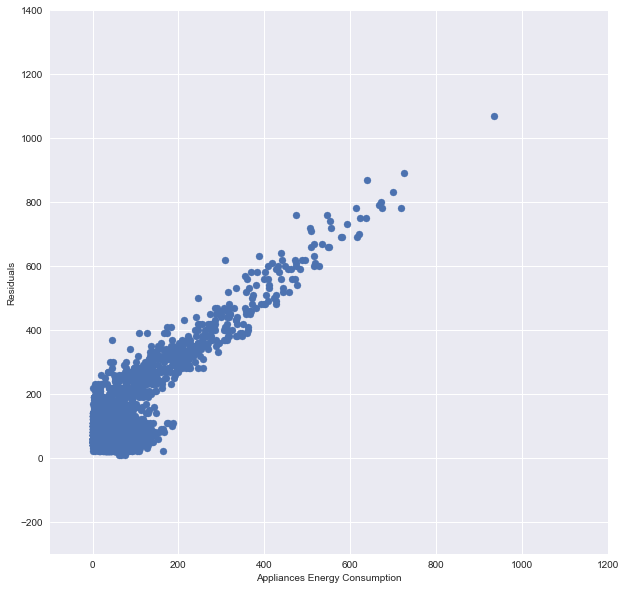

In [50]:
xxx =plt.subplots(figsize=(10,10))
ax=plt.scatter(abs(y_test-predictions),read_testingdata['Appliances'])
plt.xlim([-100,1200])
plt.xlabel("Appliances Energy Consumption", size = 10)
plt.ylim(-300,1400)
plt.ylabel("Residuals", size = 10)

# Interpretation

As can be seen from the plot that the
relationship between the variables and the energy consumption of
appliances is not well represented by the linear model since the
residuals are not normally distributed around the horizontal axis.

In [51]:
lm = LinearRegression()
rfe = RFE(lm, 2)
X_rfe = rfe.fit_transform(X_train,y_train)  
lm.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[11 12  1  2  1  3  7 10 21 17 23  8 20 15 14  5  6  4 18  9 22 19 13 24
 16 25 26 27]


# Interpretation

As we have seen above that we predicted the Appliances value by taking all the independent variables from the dataset and in that case we got a `high Mean squared error`.Now, a better of improving the model accuracy would to be use `RFE (Recursive Feature Elimination)`, because not all features contribute to the prediction variable and thus can be removed. This is what has been done as further part of the analysis.

In [52]:
nof_list=np.arange(1,28)        
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 25
Score with 25 features: 0.149535


# Interpretation

A total number of 25 features has been returned after running RFE.

In [53]:
cols = list(X_train.columns)
model = LinearRegression()
rfe = RFE(model, 25)             
X_rfe = rfe.fit_transform(X_train,y_train)  
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')


# Interpretation

Displaying the number of variables provided by the Recursive feature eliminator function, and we will be using the same features to test our model on these features and compare the results.

In [54]:
X_train = read_trainingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

(14803, 25)


# Interpretation

Re-reading our training data on the new columns returned after performing RFE analysis.

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
X_test = read_testingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

(4932, 25)


# Interpretation

Re-reading our testing data on the new columns returned after performing RFE analysis.

In [57]:
predictions = lm.predict(X_test)

In [58]:
mse = ((y_test - lm.predict(X_test))**2).mean()
print("RMSE:", np.sqrt(mse))

RMSE: 93.69971138183963


In [59]:
print("MSE:", mean_squared_error(y_test, predictions))
print("R^2:", r2_score(y_test, predictions))

MSE: 8779.635913040014
R^2: 0.14953460295416499


In [60]:
df= pd.DataFrame({"Actual Appliances' values": y_test, "Predicted Appliances' values": predictions})
df.head()

Actual Appliances' values  Predicted Appliances' values
0                         50                       158.324
1                         60                       172.637
2                        230                       209.879
3                        580                       195.107
4                        100                       191.219

Text(0, 0.5, 'Residuals')

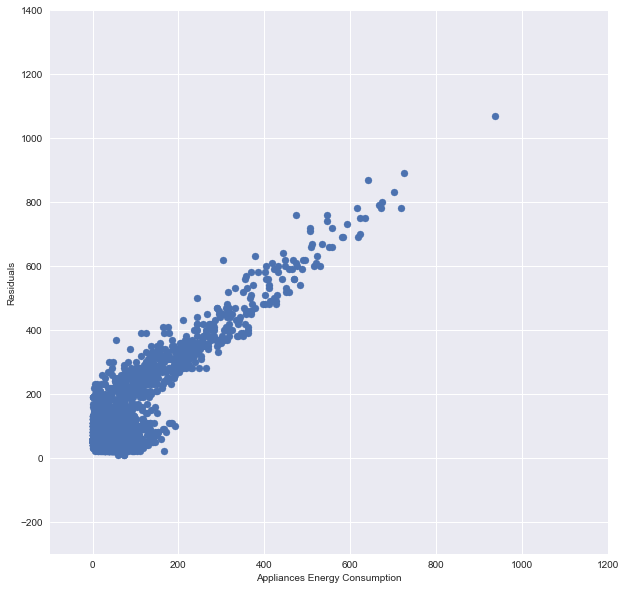

In [61]:
zzz =plt.subplots(figsize=(10,10))
x=plt.scatter(abs(y_test-predictions),read_testingdata['Appliances'])
plt.xlim([-100,1200])
plt.xlabel("Appliances Energy Consumption", size = 10)
plt.ylim(-300,1400)
plt.ylabel("Residuals", size = 10)

# Overall interpretation on Linear Regression Model

Steps executed for Linear Regression model:

1. Reading training data and assigning all the independent variables to X_train and the dependent variable (to be precited) `Appliances` to y_train.
2. Fit the linear regression model and print the intercept and coefficient.
3. Printing the actual and predicted values on training data (after training the model)
4. Reading testing data and assigning all the independent variables to X_test and the dependent variable (to be precited) `Appliances` to y_test.
5. Calculating the RMSE and R squared value on test data for the mentioned features. The `RMSE value comes out to be 93.56425120887658` and `R squared value comes out to be 0.15199183390308568`.
6. Printing the actual and predicted values on testing data. (testing the model on new test data).
7. Plotting the residual values plot of the differences between actual and predicted values on the test data with all the features.

8. The next step is to use `RFE (Recursive feature elimination)` to eliminate the features which are least important for our analysis. After performing that step, the RFE gives us 25 features to train and test the model.
9. Printing the actual and predicted values on testing data after using RFE. (We observe the the RMSE has increased). It can be because of the fact that, we have reduced the number of features to test our model on and so the accuracy of the model is not upto the mark.


# Final Conclusion

We have seen that even after using RFE and using 25 features to first train our model and then using our model to predict on the testing data, the Mean Squared Error is still quite high and we can derive the conclusion that we may require large number of variables to test our model and observe the fact the Mean Squared error may significantly reduce, when the number of features are more.